In [19]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf


In [20]:
def getdata(a,b):
    img_rows, img_cols = 28, 28
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_zo = []
    y_zo = []
    for i in range(len(y_train)):
        if y_train[i] == a or y_train[i] == b:
            x_zo.append(x_train[i])
            y_zo.append(y_train[i])
    xt_zo = []
    yt_zo = []

    for i in range(len(y_test)):
        if y_test[i] == a or y_test[i] == b:
            xt_zo.append(x_test[i])
            yt_zo.append(y_test[i])
    x_zo = np.array(x_zo)
    y_zo = np.array(y_zo)
    xt_zo = np.array(xt_zo)
    yt_zo = np.array(yt_zo)
    return x_zo, y_zo, xt_zo, yt_zo

In [29]:
def train(x_zo,y_zo,xt_zo,yt_zo):
    if K.image_data_format() == 'channels_first':
        x_zo = x_zo.reshape(x_zo.shape[0], 1, img_rows, img_cols)
        xt_zo = xt_zo.reshape(xt_zo.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_zo = x_zo.reshape(x_zo.shape[0], img_rows, img_cols, 1)
        xt_zo = xt_zo.reshape(xt_zo.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_zo.astype('float32')
    x_test = xt_zo.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_zo.shape,x_train.shape[0], 'train samples', y_zo.shape)
    print(x_test.shape[0], 'test samples')

    y_train = keras.utils.to_categorical(y_zo, 10 )
    y_test =  keras.utils.to_categorical(yt_zo, 10)

    print(y_zo.shape,y_train.shape)
    nm = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28,1), name = "Input"),
        keras.layers.Dense(128, activation=tf.nn.relu ,name = "H"),
        keras.layers.Dense(10, activation=tf.nn.softmax, name = "output")
    ])

    nm.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    nm.fit(x_zo, y_zo, epochs=10)
    return nm, x_test, y_test

In [6]:
loss , acc = nm.evaluate(xt_zo, yt_zo)
print(acc)

2115/2115 [==============================] - 0s 74us/step
0.9971631205673759


In [22]:
from graphviz import Graph, render
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

def vispredict(nm, x, y):
    w1,b1 = nm.layers[1].get_weights()
    w2,b2 = nm.layers[2].get_weights()
    W1 = np.vstack([w1])
    X = x.reshape(784,)
    X1 = np.dot(X,W1)
    X1 = np.add(X1, b1)
    X1[X1<0]=0
    W2 = np.vstack([w2])
    X2 = np.dot(X1,W2)
    X2 = np.add(X2,b2)
    X2 = softmax(X2)
    dot = Graph(format='png')
    dot.attr(bgcolor='purple:pink', kw = "edge", style = "invis",nodesep = "0")
    dot.attr(kw = "graph", nodesep = "0", ranksep = "0")

    color = ["red","green"]
    green = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    dot.node('I',str(y[0]),color = "blue",style = "filled",**{'width':str(.2), 'height':str(.2)})
    maxa = np.amax(X)
    maxc = np.amax(X1)
    maxd = np.amax(X2)
    A = []
    s = 0.05
    for i in range(X.shape[0]):
        if X[i] > 0:
            ind = int((X[i])//(maxa/4))
            #print(ind,X[i])
            c = green[ind]
            dot.node('x_'+str(i), '', color = c,fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
             dot.node('x_'+str(i), '', color = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})
    E = []
    total = 0
    for j in range(X.shape[0]):
        total += 1
        #if X[j] > 0:
        E.append(('I','x_'+str(j)))

    #print(len(E),total,100*len(E)/total)
    #A.append(100*len(E)/total)
    dot.edges(E)
    for i in range(X1.shape[0]):
        if X1[i] > 0:
            ind = int((X1[i])//(maxc/4))
            c = green[ind]
            dot.node('x1_'+str(i), '', color = c, fillcolor = c,style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
             dot.node('x1_'+str(i), '', color = color[0], fillcolor = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})

    E1 = []
    total = 0
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            total += 1
            if X[i] > 0:
                E1.append(('x_'+str(i),'x1_'+str(j)))
    # Adding edges
    #print(len(E1),total,100*len(E1)/total)
    A.append(100*len(E1)/total)
    dot.edges(E1)
    for i in range(X2.shape[0]):
        if X2[i] > 0:
            ind = int((X2[i])//(maxd/4))
            c = green[ind]
            dot.node('x2_'+str(i), str(X2[i]), color = c, fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
            dot.node('x2_'+str(i), str(X2[i]), color = color[0], fillcolor = color[0],style  = "filled",**{'width':str(s), 'height':str(s)})
    E2 = []
    total = 0
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            total += 1
            if X1[i] > 0:
                E2.append(('x1_'+str(i),'x2_'+str(j)))
    #print(len(E2), total, 100*len(E2)/total)
    A.append(100*len(E2)/total)
    dot.edges(E2)
    return dot, A

(1, 28, 28, 1)
[8.16326530612245, 35.15625]


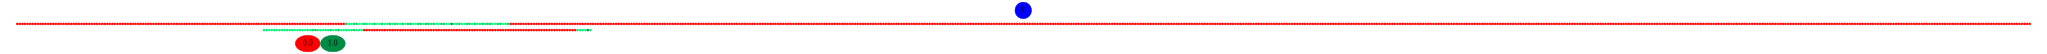

In [12]:
x = xt_zo[0:1]
print(x.shape)
y = yt_zo[0:1]
dot, A = vispredict(nm,x,y)
print(A)
dot

In [16]:
zeros = []
count = 0
for i in range(len(yt_zo)):
    if yt_zo[i] == 0:
        zeros.append((xt_zo[i:i+1], yt_zo[i:i+1]))
        count += 1
        if count == 5:
            break
ones = [] 
count = 0
for i in range(len(yt_zo)):
    if yt_zo[i] == 1:
        ones.append((xt_zo[i:i+1], yt_zo[i:i+1]))
        count += 1
        if count == 5:
            break

In [17]:
for i in range(0,len(zeros)):
    x, y = zeros[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('C:/Users/johir/Desktop/mlpl/NetworkSlice/zero{0}'.format(i))
    #render('dot', 'png', 'C:/Users/johir/Desktop/mlpl/NetworkSlice/zero{0}.gv'.format(i))

(1, 28, 28, 1)
[24.617346938775512, 36.71875]
(1, 28, 28, 1)
[21.556122448979593, 37.5]
(1, 28, 28, 1)
[21.428571428571427, 35.15625]
(1, 28, 28, 1)
[34.183673469387756, 38.28125]
(1, 28, 28, 1)
[25.0, 32.8125]


In [18]:
for i in range(0,len(ones)):
    x, y = ones[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('C:/Users/johir/Desktop/mlpl/NetworkSlice/one{0}'.format(i))

(1, 28, 28, 1)
[8.16326530612245, 35.15625]
(1, 28, 28, 1)
[10.459183673469388, 34.375]
(1, 28, 28, 1)
[9.566326530612244, 38.28125]
(1, 28, 28, 1)
[8.673469387755102, 42.1875]
(1, 28, 28, 1)
[7.780612244897959, 40.625]


In [30]:
X, Y, x, y = getdata(3,9)
print(X.shape)

(12080, 28, 28)


In [31]:
nm , xt, yt = train(X, Y, x,y)

x_train shape: (12080, 28, 28, 1)
(12080, 28, 28, 1) 12080 train samples (12080,)
2019 test samples
(12080,) (12080, 10)
Epoch 1/10
12080/12080 [==============================] - 2s 132us/step - loss: 8.0395 - acc: 0.5011
Epoch 2/10
12080/12080 [==============================] - 1s 113us/step - loss: 7.9376 - acc: 0.5075
Epoch 3/10
12080/12080 [==============================] - 1s 103us/step - loss: 7.9376 - acc: 0.5075
Epoch 4/10
12080/12080 [==============================] - 1s 111us/step - loss: 7.9376 - acc: 0.5075
Epoch 5/10
12080/12080 [==============================] - 1s 106us/step - loss: 7.9376 - acc: 0.5075
Epoch 6/10
12080/12080 [==============================] - 1s 105us/step - loss: 7.9376 - acc: 0.5075
Epoch 7/10
12080/12080 [==============================] - 1s 109us/step - loss: 7.9376 - acc: 0.5075
Epoch 8/10
12080/12080 [==============================] - 2s 126us/step - loss: 7.9376 - acc: 0.5075
Epoch 9/10
12080/12080 [==============================] - 1s 108us/step

In [32]:
nm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
H (Dense)                    (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
